># 4 신경망 학습

## 4.1 데이터에서 학습한다!

#### 퍼셉트론 수렴 정리

- 선형 분리 가능 문제는 유한 번의 학습으로 해결 가능함이 증명
- 비선형 분리 문제는 자동으로 학습 불가능

### 4.1.1 데이터 주도 학습

- 알고리즘을 밑바닥부터 설계하는 대신, 주어진 데이터를 활용
- 이미지에서 특징을 추출, 그 특징의 패턴을 기계학습 기술로 학습
- 사람의 개입을 최소화 하지만, 여전히 '사람'이 설계함을 주의

#### 규칙을 배우는 패러다임의 변화

① 사람이 생각한 알고리즘 -> 결과

② 사람이 생각한 특징(SIFT, HOG 등) -> 기계학습(SVM, KNN 등) -> 결과

③ 신경망(딥러닝) -> 결과

※ 종단간 기계학습: 데이터 입력부터 출력까지 사람의 개입이 없는 딥러닝의 특징
- 주어진 데이터 그대로를 입력 데이터로 활용 'end-to-end'로 학습 가능

### 4.1.2 훈련 데이터와 시험 데이터

- 범용 능력(일반화)의 평가를 위해 훈련 데이터와 시험 데이터를 분리

## 4.2 손실 함수

### 4.2.1 평균 제곱 오차

## <center> $E = \frac{1}{2} \sum_{k} (y_{k}-\hat{y}_{k})^2$ </center>

## <center> $E = \frac{1}{2} \sum_{k} (y_{k}-t_{k})^2$ </center>

In [268]:
# 통계학에서 y_hat과 같음
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# 통계학에서 y와 같음
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

- t와 같이 한 원소만 1로 나타내는 표기법을 원-핫 인코딩이라고 함

In [269]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t) ** 2)

In [270]:
import numpy as np

# 정답은 '2'
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1) '2'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

# 예2) '7'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


- 제곱 오차가 적은 예1)이 정답에 더 가까움

### 4.2.2 교차 엔트로피 오차

## <center> $E = -\sum_{k}t_{k}log y_{k}$ </center>

- 여기서 $log$는 밑이 $e$인 자연로그($log_{e}$)
- $y_{k}$는 신경망의 출력, $t_{k}$는 정답 레이블
- ex) 신경망 출력이 0.6이라면 교차 엔트로피 오차는 $-log 0.6$ = 0.51

In [271]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

-  아주 작은 값인 delta를 더하는 이유는 no.log() 함수에 0을 입력하면 -inf가 되기 때문

In [272]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1) '2'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

# 예2) '7'일 확률이 가장 높다고 추정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### 4.2.3 미니배치 학습

- 모든 훈련 데이터를 대상으로 손실 함수 값을 구하고 그 총 합을 지표로 삼아야 함
- 하지만 많은 데이터를 대상으로 학습을 하는 것은 현실적으로 무리가 있음
- 훈련 데이터로부터 일부만 골라 학습(표본 추출의 개념)

## <center> $E = -\frac{1}{N}\sum_{n}\sum_{k}t_{nk}log y_{nk}$ </center>

In [273]:
%run mnist.py

import sys, os
sys.path.append(os.pardir)
def load_mnist(normalize=True, flatten=True, one_hot_label=False):

    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    # 정규화
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [274]:
# 인덱스로 무작위 미니배치를 추출 
train_size = x_train.shape[0]
batch_size = 10
np.random.seed(0)
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(60000, 10)

array([20757, 55026, 46884, 14935, 15430, 48600, 39512, 52620, 14650,
       17089])

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

#### ① 정답 레이블이 원-핫 인코딩일 때

In [275]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y,reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

#### ② 정답 레이블이 원-핫 인코딩이 아닐 때

In [276]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y,reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

### 4.2.5 왜 손실 함수를 설정하는가?

- 손실 함수의 값을 가능한 한 작게 하는 매개변수 값을 찾음
- 매개변수의 미분 값을 단서로 값을 서서히 갱신함(과정 반복)
    - ① 미분 값이 양수면 가중치 매개변수를 음의 방향으로 -> 손실 함수의 값을 줄임
    - ② 미분 값이 음수면 가중치 매개변수를 양의 방향으로 -> 손실 함수의 값을 줄임
    - ③ 미분 값이 0이면 가중치 매개변수의 갱신을 멈춤

w1 미분 값: 0.000
손실함수 값: 0.000


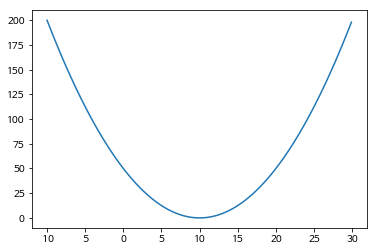

In [277]:
import numpy as np
import matplotlib.pyplot as plt

# y와 x는 임의 지정
y = 10
x = 1
w = np.arange(-10.0, 30.0, 0.1) # 가중치 매개변수 w
yhat = w * (x ** 2) # 예측값
son = 1/2 * (y - yhat) ** 2 # 손실함수

plt.plot(w, son)

w1 = 10 # w1이 0일 때 기울기 0
yhat2 = w1 * (x ** 2)
son2 = 1/2 * (y - yhat2) ** 2

print("w1 미분 값: {:.3f}".format(w1-10)) # 도함수에 w1값 대입
print("손실함수 값: {:.3f}".format(son2))

#### 정확도를 지표로 하면 안되는 이유

- 매개변수 조정을 한다고 해도 불연속적인 변화가 일어남
- 손실 함수를 지표로 사용할 경우에는 연속적인 변화

## 4.3 수치 미분

### 4.3.1 미분

- 미분을 근사치로 계산하는 방법을 '수치 미분'이라고 함
- 미세한 값 h로 $10^{-4}$ 정도의 값을 쓰면 좋다고 알려짐(하지만 분명 정확하진 않음)
- 오차를 줄이기 위해 함수 f의 차분을 계산하는 방법을 쓰기도 함

In [278]:
# 미분의 잘못된 구현, 반올림 오차 문제를 일으킴
def numerical_diff(f, x):
    h = 10e-50
    return(f(x + h) - f(x)) / h

In [279]:
# 반올림 오차의 예
np.float32(1e-50)

0.0

In [280]:
# 중심차분(중앙차분) 이용
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

### 4.3.2 수치 미분의 예

In [281]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

0.1999999999990898


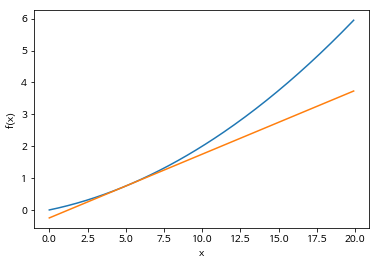

In [282]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 4.3.3 편미분

In [283]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

#### 문제1: $x_{0} = 3, x_{1} = 4$일 때, $x_{0}$에 대한 편미분을 구하라.

In [284]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

#### 문제2: $x_{0} = 3, x_{1} = 4$일 때, $x_{1}$에 대한 편미분을 구하라.

In [285]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기

- 모든 편미분을 벡터로 정리한 것을 기울기(gradient)라고 함

#### 각 변수들의 편미분을 동시에 계산하고 싶다면?

In [286]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 영행렬
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad        

#### 세 점 (3, 4), (0, 2), (3 0)에서의 기울기

In [287]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


#### 여기서 기울기가 의미하는 것은?

No handles with labels found to put in legend.


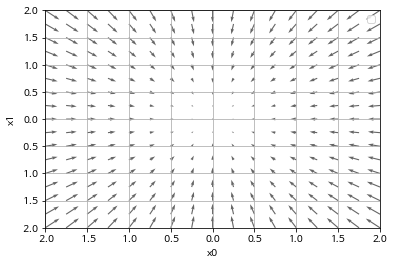

In [288]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

- 위 이미지에서 화살표(기울기)는 가장 낮은 장소를 가리키는 듯 보임
- 그러나 사실은 각 지점에서 낮아지는 방향을 가리키는 것
- 기울기가 가리키는 쪽은 각 장소에서 함수의 출력을 가장 크게 줄이는 방향

### 4.4.1 경사법(경사 하강법)

- 머신러닝 문제의 대부분은 최적의 매개변수를 찾는 것
- 손실 함수가 최솟값이 될 때의 매개변수 값
- 함수의 값을 낮추는 방안을 제시하는 지표가 기울기, 단서
- 기울기가 가리키는 곳에 정말 함수의 최솟값이 있을지는 보장할 수 없음

※ 안장점: 어느 방향에서 보면 긋댓갑이고 어떤 방향에서 보면 극솟값이 되는 점

※ 고원: 학습이 잘 진행되지 않는 평평한 곳, 정체기

※ 경사 상승법: 최솟값이 아니라 최댓값을 찾을 때

#### 경사법을 수식으로 나타내면?

## <center>$x_{0} = x_{0} - \eta\frac{\partial f}{\partial x_{0}}$</center>

## <center>$x_{1} = x_{1} - \eta\frac{\partial f}{\partial x_{1}}$</center>

- $\eta$는 갱신하는 양을 나타냄, 학습률
- 학습률은 하이퍼파라미터로 사람이 직접 설정해야 함

In [289]:
# 경사 하강법의 구현
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x # 초깃값
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad # lr은 learning late의 줄임말
    return x

In [290]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

#### ① 학습률이 너무 큰 예

In [291]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

#### ② 학습률이 너무 작은 예

In [292]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

#### ③ 기울기 갱신 과정의 예

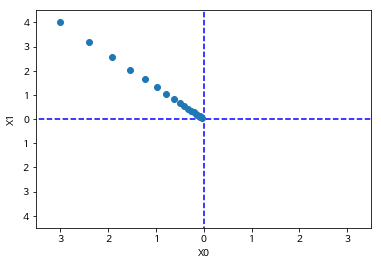

In [293]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


### 4.4.2 신경망에서의 기울기

## <center>$W = \begin{pmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \end{pmatrix}$</center>

## <center>$\frac{\partial L}{\partial W} = \begin{pmatrix} \frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\ \frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}} \end{pmatrix}$</center>

- $\frac{\partial L}{\partial W}$의 각 원소는 각각의 원소에 관한 편미분
- $\frac{\partial L}{\partial w_{11}}$은 $w_{11}$을 조금 변경했을 때 손실 함수 L이 얼마나 변화하느냐를 나타냄

In [294]:
# 간단한 신경망으로 기울기를 구해보자
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [295]:
net = simpleNet()
print(net.W)

[[0.14404357 1.45427351 0.76103773]
 [0.12167502 0.44386323 0.33367433]]


In [296]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[0.19593366 1.27204101 0.75692953]


In [297]:
# 최댓값의 인덱스
np.argmax(p)

1

In [298]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)

1.1769503254825748

In [299]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def f(W):
    return net.loss(x, t)
# f = lambda w: net.loss(x, t)라고 구현할 수도 있음

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.10552868  0.30954088 -0.41506956]
 [ 0.15829303  0.46431132 -0.62260435]]


## 4.5 학습 알고리즘 구현하기

#### 전제
신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라고 함

#### 1단계 - 미니배치
훈련 데이터 중 일부를 무작위로 선별한 데이터를 미니배치라 하며 그 미니배치의 손실 함수 값을 줄이는 것이 목표(확률적 경사 하강법이 됨)

#### 2단계 - 기울기 산출
미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함, 기울기는 손실 함수를 가장 작게 하는 방향을 제시

#### 3단계 - 매개변수 갱신
가중치 매개변수를 기울기 방향으로 조금씩 갱신

#### 4단계 - 반복
1~3단계를 반복

### 4.5.1 2층 신경망 클래스 구현하기

In [304]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size,
                weight_init_std=0.01):
        
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
    
    # x: 입력 데이터, t: 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
    
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
    
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x: 입력 데이터, t: 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
    
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
    
        return grads

In [306]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


### 4.5.2 미니배치 학습 구현하기

In [307]:
%run mnist.py

import sys, os
sys.path.append(os.pardir)
def load_mnist(normalize=True, flatten=True, one_hot_label=False):

    if not os.path.exists(save_file):
        init_mnist()
        
    with open(save_file, 'rb') as f:
        dataset = pickle.load(f)
    
    # 정규화
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [324]:
train_loss_list = []

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
# 하이퍼파라미터
iters_num = 10 # 반복 횟수
train_size = x_train.shape[0]
batch_size = 100 # 미니 배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

In [325]:
print(train_loss_list)

[890.061259627451, 748.4054224443955, 744.6493713668192, 703.4436726297447, 700.6715492301944, 693.2520014350655, 685.4308864411187, 685.9500417785723, 683.933013912134, 688.4318923100428]


Text(0, 0.5, '손실 함수의 값')

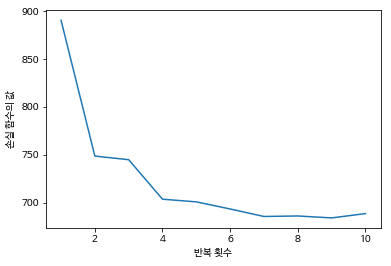

In [329]:
plt.plot(range(1,iters_num+1), train_loss_list)
plt.xlabel("반복 횟수")
plt.ylabel("손실 함수의 값")

### 4.5.3 시험 데이터로 평가하기

- 한 개의 미니배치에 대한 손실 함수 값만으로는 일반화 정도를 알기 어려움
- 오버피팅을 일으키지 않았는지 확인할 필요가 있음

※ 에폭(epoch): 훈련 데이터를 모두 소진했을 때의 횟수, 훈련 데이터 1000개를 100개의 미니배치로 학습할 경우, 확률적 경사 하강법을 10회 반복해야 훈련 데이터를 모두 소진, 따라서 여기서의 10회를 1에폭이라고 할 수 있음

#### 에폭에 관한 내용을 추가하여 같은 내용을 다시 학습

In [342]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", "+ str(test_acc))

train acc, test acc | 0.09871666666666666, 0.098


## 4.6 정리